In [231]:
filename='final.json'

In [232]:
import pandas as pd
from SignalIntegrity.Lib.ToSI import ToSI
import json
import math
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

#print(os.path.splitext(os.path.split(filename)[-1])[0])
with open(filename,'r') as f:
    jd= json.load(f)
fmul=jd['convergence']['frequency multiplier']
funit = ToSI(fmul,'Hz').split()[-1]
tmul=fmul*1000
tunit = ToSI(1/tmul,'s').split()[-1]

In [233]:
data = {'item': jd['configuration'].keys(), 'config': jd['configuration'].values()}
df = pd.DataFrame(data)
df = df.style.set_caption("Configuration")
# Display the DataFrame
display(df)

,item,config
0,filename,C:\Users\pete_\Documents\SignalIntegrity\Test\TestSignalIntegrity\TestPoleZeroFitter\TF_main_lowQ_pex_typical_MM.s4p
1,fit_type,complex
2,debug,False
3,profile,False
4,verbose,True
5,zero_pairs,2
6,pole_pairs,4
7,guess_file,guess.json
8,output_file,final.json
9,end_frequency,85000000000.000000


In [234]:
data = {'item': jd['convergence'].keys(), 'convergence': jd['convergence'].values()}
df = pd.DataFrame(data)
df = df.style.set_caption("Convergence")
# Display the DataFrame
display(df)

,item,convergence
0,iterations,211612
1,mse,0.135453
2,time,133.495905
3,completed,08/14/2025 10:45:43
4,why stopped,filtered delta lamda and mse both went below threshold
5,frequency multiplier,1000000000.000000


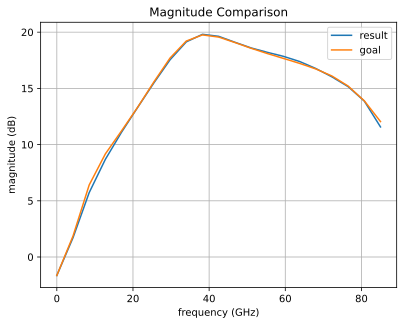

In [235]:
plt.cla()
result_magnitude=20.*np.log10(np.array(jd['response']['result']['magnitude']))
goal_magnitude=20.*np.log10(np.array(jd['response']['goal']['magnitude']))

plt.plot(np.array(jd['response']['frequency'])/fmul,result_magnitude,label='result')
plt.plot(np.array(jd['response']['frequency'])/fmul,goal_magnitude,label='goal')
plt.legend()
plt.xlabel(f'frequency ({funit})')
plt.ylabel('magnitude (dB)')
plt.title('Magnitude Comparison')
plt.grid(True,'both')
plt.show()

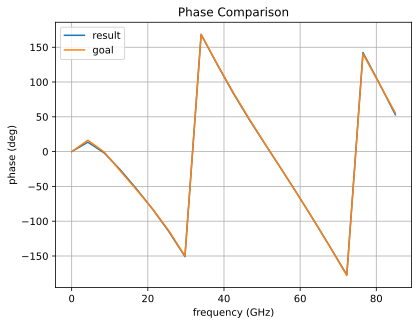

In [236]:
plt.cla()
result_phase=np.array(jd['response']['result']['phase'])
goal_phase=np.array(jd['response']['goal']['phase'])

plt.plot(np.array(jd['response']['frequency'])/fmul,result_phase,label='result')
plt.plot(np.array(jd['response']['frequency'])/fmul,goal_phase,label='goal')
plt.legend()
plt.xlabel(f'frequency ({funit})')
plt.ylabel('phase (deg)')
plt.title('Phase Comparison')
plt.grid(True,'both')
plt.show()

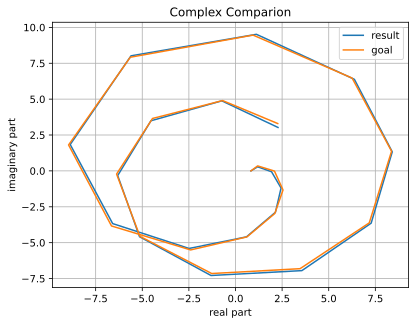

In [237]:
plt.cla()
result=np.array(jd['response']['result']['magnitude'])*np.exp(1j*np.array(jd['response']['result']['phase'])*np.pi/180)
goal=np.array(jd['response']['goal']['magnitude'])*np.exp(1j*np.array(jd['response']['goal']['phase'])*np.pi/180)
plt.plot(result.real,result.imag,label='result')
plt.plot(goal.real,goal.imag,label='goal')
plt.legend()
plt.xlabel('real part')
plt.ylabel('imaginary part')
plt.title('Complex Comparion')
plt.grid(True,'both')
plt.show()

In [238]:
poles=[(p['real']+1j*p['imag'])/fmul/2/np.pi for p in jd['pole']['list']]
zeros=[(z['real']+1j*z['imag'])/fmul/2/np.pi for z in jd['zero']['list']]
magnitudes=np.abs(np.array(zeros+poles))
labels=[f"zero {zp}" for zp in range(len(zeros))]
labels+=[f"pole {pp}" for pp in range(len(poles))]
data = {'item': labels,f'complex ({funit})': zeros+poles, f'magnitude ({funit})':magnitudes}

df = pd.DataFrame(data)
df = df.sort_values(by=f'magnitude ({funit})')
df = df.style.set_caption('pole/zero locations')
# Display the DataFrame
df

,item,complex (GHz),magnitude (GHz)
3,zero 3,-3.803391+0.000000j,3.803391
5,pole 1,-6.112391+0.000000j,6.112391
1,zero 1,-6.321594+0.000000j,6.321594
4,pole 0,-19.119821+0.000000j,19.119821
8,pole 4,-11.691601+35.888928j,37.745314
9,pole 5,-11.691601-35.888928j,37.745314
6,pole 2,-17.856510+63.635777j,66.093623
7,pole 3,-17.856510-63.635777j,66.093623
10,pole 6,-10.584291+83.570026j,84.237619
11,pole 7,-10.584291-83.570026j,84.237619


In [239]:
polepairs_f0=[pp['f0']/fmul for pp in jd['pole pair']['list']]
polepairs_Q=[pp['Q'] for pp in jd['pole pair']['list']]
polepairs_peakf=[pp['fr']/fmul for pp in jd['pole pair']['list']]
polepairs_peakdB=[pp['peakdB'] for pp in jd['pole pair']['list']]
zeropairs_f0=[zp['f0']/fmul for zp in jd['zero pair']['list']]
zeropairs_Q=[zp['Q'] for zp in jd['zero pair']['list']]
zeropairs_peakf=[zp['fr']/fmul for zp in jd['zero pair']['list']]
zeropairs_peakdB=[zp['peakdB'] for zp in jd['zero pair']['list']]
labels=[f"zero pair {zp}" for zp in range(len(zeropairs_f0))]
labels+=[f"pole pair {pp}" for pp in range(len(polepairs_f0))]
data = {'item': labels,f'f0 ({funit})': zeropairs_f0+polepairs_f0,
       'Q': zeropairs_Q+polepairs_Q, f'peak freq ({funit})': zeropairs_peakf+polepairs_peakf,
       'peaking (dB)':zeropairs_peakdB+polepairs_peakdB}
df = pd.DataFrame(data)
df = df.sort_values(by=f'f0 ({funit})')

# Display the DataFrame
df

,item,f0 (GHz),Q,peak freq (GHz),peaking (dB)
2,pole pair 0,10.810542,0.428442,0.000000,0.000000
4,pole pair 2,37.745314,1.614206,33.931131,4.597232
1,zero pair 1,52.314680,0.072320,0.000000,0.000000
3,pole pair 1,66.093623,1.850687,61.079105,5.675824
5,pole pair 3,84.237619,3.979370,82.897057,12.065397
0,zero pair 0,425.000099,0.014871,0.000000,0.000000


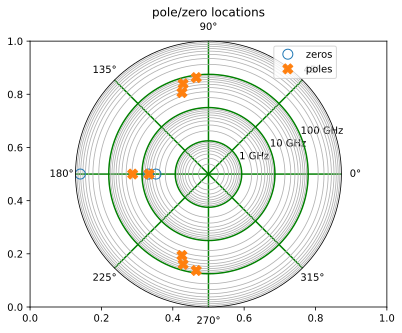

In [240]:
zero_angle = [jd['zero']['list'][z]['angle']['rad'] for z in range(jd['zero']['number of'])]
zero_mag = [jd['zero']['list'][z]['mag']/fmul/2/np.pi for z in range(jd['zero']['number of'])]
pole_angle = [jd['pole']['list'][z]['angle']['rad'] for z in range(jd['pole']['number of'])]
pole_mag = [jd['pole']['list'][z]['mag']/fmul/2/np.pi for z in range(jd['pole']['number of'])]
fig,axs=plt.subplots(1,1)
ax=fig.add_subplot(1,1,1,projection='polar')
ax.set_rscale('log')
#axs[1,1]=ax
ax.cla()
ax.set_rscale('log')
ax.set_title('pole/zero locations')
ax.plot(zero_angle,zero_mag,marker='o', linestyle='',markersize=10, markerfacecolor='none',label='zeros')
ax.plot(pole_angle,pole_mag,marker='X', linestyle='',markersize=10, label = 'poles')
ax.set_rticks([1, 10, 100])
ax.set_yticklabels([f'1 {funit}', f'10 {funit}', f'100 {funit}'])
#ax.tick_params(axis='y', colors='red', which='major')
ax.grid(True, color='green', linewidth=1.5)
ax.set_rmin(0.1)
ax.set_rmax(1000)
ax.grid(True,'both')
ax.legend()
plt.show()

In [241]:
zeros=[zero['real']+1j*zero['imag'] for zero in jd['zero']['list']]
poles=[pole['real']+1j*pole['imag'] for pole in jd['pole']['list']]
gain=jd['gain']['value']
delay=jd['delay']['value']
s=[1j*2*np.pi*f for f in jd['response']['frequency']]
def H(s,g,Td,zeros,poles):
    return g*np.exp(-s*Td)*math.prod([(s-z)/z for z in zeros])/math.prod([(s-p)/p for p in poles])
H=np.array([H(s,gain,delay,zeros,poles) for s in s])

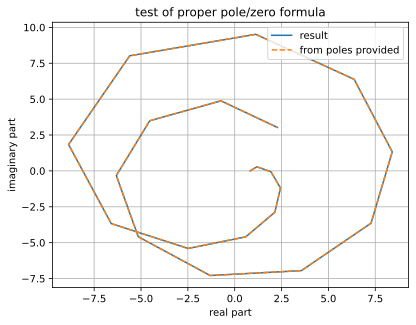

In [242]:
plt.cla()
result=np.array(jd['response']['result']['magnitude'])*np.exp(1j*np.array(jd['response']['result']['phase'])*np.pi/180)
goal=np.array(jd['response']['goal']['magnitude'])*np.exp(1j*np.array(jd['response']['goal']['phase'])*np.pi/180)
plt.plot(result.real,result.imag,label='result')
plt.plot(H.real,H.imag,linestyle='--',label='from poles provided')
plt.legend()
plt.xlabel('real part')
plt.ylabel('imaginary part')
plt.grid(True,'both')
plt.title('test of proper pole/zero formula')
plt.show()

In [243]:
wp=[pp['w0'] for pp in jd['pole pair']['list']]
Qp=[pp['Q'] for pp in jd['pole pair']['list']]
wz=[zp['w0'] for zp in jd['zero pair']['list']]
Qz=[zp['Q'] for zp in jd['zero pair']['list']]
gain=jd['gain']['value']
delay=jd['delay']['value']
s=[1j*2*np.pi*f for f in jd['response']['frequency']]
def H(s,g,Td,wz,Qz,wp,Qp):
    return g*np.exp(-s*Td)*math.prod([(s*s+w0/Q*s+w0*w0)/(w0*w0) for w0,Q in zip(wz,Qz)])/math.prod([(s*s+w0/Q*s+w0*w0)/(w0*w0) for w0,Q in zip(wp,Qp)])
H=np.array([H(s,gain,delay,wz,Qz,wp,Qp) for s in s])

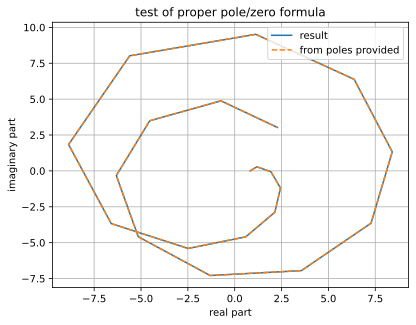

In [244]:
plt.cla()
result=np.array(jd['response']['result']['magnitude'])*np.exp(1j*np.array(jd['response']['result']['phase'])*np.pi/180)
goal=np.array(jd['response']['goal']['magnitude'])*np.exp(1j*np.array(jd['response']['goal']['phase'])*np.pi/180)
plt.plot(result.real,result.imag,label='result')
plt.plot(H.real,H.imag,linestyle='--',label='from poles provided')
plt.legend()
plt.xlabel('real part')
plt.ylabel('imaginary part')
plt.grid(True,'both')
plt.title('test of proper pole/zero formula')
plt.show()

In [245]:
wp=[pp['w0'] for pp in jd['pole pair']['list']]
Qp=[pp['Q'] for pp in jd['pole pair']['list']]
wz=[zp['w0'] for zp in jd['zero pair']['list']]
Qz=[zp['Q'] for zp in jd['zero pair']['list']]
frp=[pp['fr'] for pp in jd['pole pair']['list']]
peakp=[pp['peakdB'] for pp in jd['pole pair']['list']]
frz=[zp['fr'] for zp in jd['zero pair']['list']]
peakz=[zp['peakdB'] for zp in jd['zero pair']['list']]
delay=jd['delay']['value']
s=[1j*2*np.pi*f for f in jd['response']['frequency']]
def H(s,w0,Q):
    return (s*s+w0/Q*s+w0*w0)/(w0*w0)
Hz=[]
for w0,Q in zip(wz,Qz):
    Hz.append(np.array([H(s,w0,Q) for s in s]))
Hp=[]
for w0,Q in zip(wp,Qp):
    Hp.append(np.array([1./H(s,w0,Q) for s in s]))

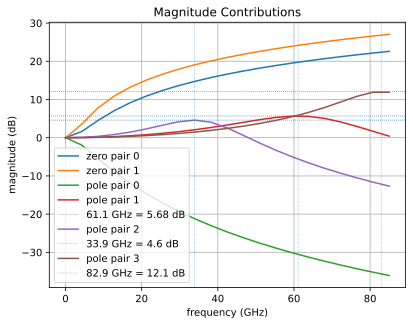

In [246]:
plt.cla()
for zp in range(len(Hz)):
    plt.plot(np.array(jd['response']['frequency'])/fmul,20.*np.log10(abs(Hz[zp])),label='zero pair '+str(zp))
for pp in range(len(Hp)):
    plt.plot(np.array(jd['response']['frequency'])/fmul,20.*np.log10(abs(Hp[pp])),label='pole pair '+str(pp))
    if frp[pp] != 0:
        plt.axvline(frp[pp]/fmul,linestyle=':',linewidth=0.5,label=ToSI(frp[pp],'Hz',round=3)+' = '+ToSI(peakp[pp],'dB',round=3))
        plt.axhline(peakp[pp],linestyle=':',linewidth=0.75)
plt.legend()
plt.xlabel(f'frequency ({funit})')
plt.ylabel('magnitude (dB)')
plt.title('Magnitude Contributions')
plt.grid(True,'both')
plt.show()

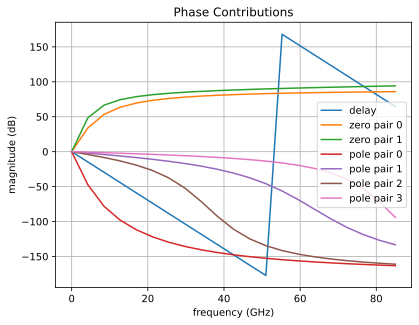

In [247]:
plt.cla()
plt.plot(np.array(jd['response']['frequency'])/fmul,np.angle(np.exp(-np.array(s)*delay))*180/np.pi,label='delay')
for zp in range(len(Hz)):
    plt.plot(np.array(jd['response']['frequency'])/fmul,180./np.pi*(np.angle(Hz[zp])),label='zero pair '+str(zp))
for pp in range(len(Hp)):
    plt.plot(np.array(jd['response']['frequency'])/fmul,180./np.pi*(np.angle(Hp[pp])),label='pole pair '+str(pp))
plt.legend()
plt.xlabel(f'frequency ({funit})')
plt.ylabel('magnitude (dB)')
plt.title('Phase Contributions')
plt.grid(True,'both')
plt.show()

In [248]:
wp=[pp['w0'] for pp in jd['pole pair']['list']]
Qp=[pp['Q'] for pp in jd['pole pair']['list']]
wz=[zp['w0'] for zp in jd['zero pair']['list']]
Qz=[zp['Q'] for zp in jd['zero pair']['list']]
epsilon=100
def H(w,w0,Q):
    return ((1j*w)**2+w0/Q*1j*w+w0*w0)/(w0*w0)
w=np.array([2*np.pi*f for f in jd['response']['frequency']])
GDz=[]
for w0,Q in zip(wz,Qz):
    GDz.append(-(np.angle(H(w+epsilon,w0,Q))-np.angle(H(w,w0,Q)))/epsilon)
GDp=[]
for w0,Q in zip(wp,Qp):
    GDp.append(-(np.angle(1./H(w+epsilon,w0,Q))-np.angle(1./H(w,w0,Q)))/epsilon)

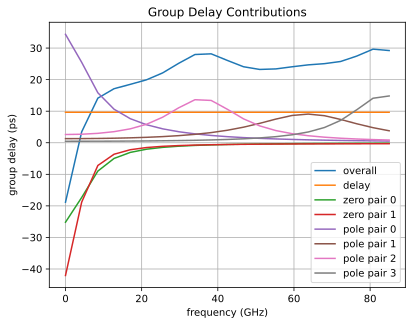

In [249]:
plt.cla()
plt.plot(np.array(jd['response']['frequency'])/fmul,(sum(GDz)+sum(GDp)+delay)*tmul,label='overall')
plt.plot(np.array(jd['response']['frequency'])/fmul,[delay*tmul for _ in range(len(jd['response']['frequency']))],label='delay')
for zp in range(len(Hz)):
    plt.plot(np.array(jd['response']['frequency'])/fmul,GDz[zp]*tmul,label='zero pair '+str(zp))
for pp in range(len(Hp)):
    plt.plot(np.array(jd['response']['frequency'])/fmul,GDp[pp]*tmul,label='pole pair '+str(pp))
plt.legend()
plt.xlabel(f'frequency ({funit})')
plt.ylabel(f'group delay ({tunit})')
plt.title('Group Delay Contributions')
plt.grid(True,'both')
plt.show()